<hr>

# EXPERIMENTO YOLOv5_UAVDT_4

<hr>

# Especificações do environment e máquina

In [1]:
%%script bash
echo "Hash key do commit YoloV5 que esta em uso:"
cd ../../Submodules/yolov5
echo $( git rev-parse --verify HEAD)
echo
echo "Verificar localizacao do python sendo executado:"
which python
echo
echo "Conda Environment Utilizado: "
conda env export

Hash key do commit YoloV5 que esta em uso:
5a40ce65ce215a79949b96f4ac2e6f4da90256ad

Verificar localizacao do python sendo executado:
/home/yuri/anaconda3/envs/yv5r4/bin/python

Conda Environment Utilizado: 
name: yv5r4
channels:
  - anaconda
  - conda-forge
  - defaults
dependencies:
  - _libgcc_mutex=0.1=conda_forge
  - _openmp_mutex=4.5=1_llvm
  - argh=0.26.2=pyh9f0ad1d_1002
  - argon2-cffi=20.1.0=py39hbd71b63_2
  - async_generator=1.10=py_0
  - attrs=20.3.0=pyhd3deb0d_0
  - backcall=0.2.0=pyh9f0ad1d_0
  - backports=1.0=py_2
  - backports.functools_lru_cache=1.6.1=py_0
  - blas=1.0=mkl
  - bleach=3.3.0=pyh44b312d_0
  - brotlipy=0.7.0=py39h3811e60_1001
  - bzip2=1.0.8=h516909a_3
  - ca-certificates=2020.12.5=ha878542_0
  - cairo=1.16.0=h3fc0475_1005
  - certifi=2020.12.5=py39hf3d152e_1
  - cffi=1.14.4=py39he88106c_0
  - chardet=4.0.0=py39hf3d152e_1
  - click=7.1.2=pyh9f0ad1d_0
  - configparser=5.0.1=py_0
  - cryptography=3.4.4=py39h95dcef6_0
  - cudatoolkit=10.1.243=h6bb024c_0
  - cy

In [2]:
# ESPECIFICAÇÕES DA MÁQIUINA E DO EXPERIMENTO
import datetime
start_time = datetime.datetime.now()
from platform import uname
from os import environ, getcwd, sep
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

time_stamp = start_time.strftime("%d_%b_%Y_%Hh_%Mm")
time_zone = datetime.datetime.now(datetime.timezone.utc).astimezone().tzname()
print("Horário: ", datetime.datetime.now(), "UTC", time_zone )
username = environ['USER']
sysinfo = uname()
hostname = sysinfo.node
root = getcwd()

experimento = root.split(sep)[-1].split("_")[:-1]
experimento = "_".join(experimento)
exp_number = root.split(sep)[-1].split("_")[-1]

# DADOS DE OUTPUT
exp_folder = f"{experimento}_{exp_number}-{time_stamp}"
output_dir_dropbox = f"~/Dropbox/Experimentos/{experimento}_{exp_number}/{exp_folder}"
output_dir_gcloud = f"gs://cfdy/Experimentos/{experimento}_{exp_number}/{exp_folder}"


# DADOS DE TREINAMENTO:
tr = {
"epocas" : "50",
"model" : "yolov5s",
"img_resolution" : "640 640",
"batch_size" : "16",
"gpu_ids" : "2",
"logdir" : "../runs",
"num_workers" : "4",
"optimizer" : "--adam", # Following paths are relative to yolov5_w.
"log_artifacts" : "--log-artifacts", #Weight e Biases log
"project" : f"../{experimento}_train", # Save training session info
"name" : f"{exp_folder}"} # Save to "../{project}/{name}"
tr["model_yaml"] = f"./models/{tr['model']}.yaml" # relative to yolov5 folder
tr["weights"] = f"../../YOLOv5_UAVDT_0/YOLOv5_UAVDT_train/"+\
                 "YOLOv5_UAVDT_0-21_Feb_2021_18h_17m/weights/best.pt"
tr["hyperparameters"] = f"../hyp.finetune.yaml"

output_dir_local = f"{root}/{tr['project'][3:]}/{tr['name']}"

# Checar conda environment
conda_env = !printenv CONDA_PROMPT_MODIFIER
#if conda_env != ['(yv5r4) ']:
#    raise SystemExit("ERRO.. Conda environment incorreto.")

print(f"""
==Computer Specifications==
username: {username}

hostname: {hostname}

system info: {sysinfo}

{{root}}: {root}

conda env: {conda_env}

experimento: {experimento}

time stamp: {time_stamp}

time zone : UTC {time_zone}

output dropbox dir: {output_dir_dropbox}

output gcloud dir: {output_dir_gcloud}

output local dir: {output_dir_local}

Dados de treinamento: {tr}
===========================
""")

Horário:  2021-02-25 13:13:54.542621 UTC -03

==Computer Specifications==
username: yuri

hostname: febe

system info: uname_result(system='Linux', node='febe', release='4.15.0-133-generic', version='#137~16.04.1-Ubuntu SMP Fri Jan 15 02:55:18 UTC 2021', machine='x86_64')

{root}: /home/yuri/Desktop/cfd/RedesNeurais/YOLOv5_UAVDT_5

conda env: ['(yv5r4) ']

experimento: YOLOv5_UAVDT

time stamp: 25_Feb_2021_13h_13m

time zone : UTC -03

output dropbox dir: ~/Dropbox/Experimentos/YOLOv5_UAVDT_5/YOLOv5_UAVDT_5-25_Feb_2021_13h_13m

output gcloud dir: gs://cfdy/Experimentos/YOLOv5_UAVDT_5/YOLOv5_UAVDT_5-25_Feb_2021_13h_13m

output local dir: /home/yuri/Desktop/cfd/RedesNeurais/YOLOv5_UAVDT_5/YOLOv5_UAVDT_train/YOLOv5_UAVDT_5-25_Feb_2021_13h_13m

Dados de treinamento: {'epocas': '50', 'model': 'yolov5s', 'img_resolution': '640 640', 'batch_size': '16', 'gpu_ids': '2', 'logdir': '../runs', 'num_workers': '4', 'optimizer': '--adam', 'log_artifacts': '--log-artifacts', 'project': '../YOLOv5_UAV

In [3]:
# Formatação do comando para execução via nbconvert:
command = f"""conda activate yv5r4; mkdir logs; experimento="{experimento}_{exp_number}_TRAIN"; outputFileName=$(date "+"$experimento"_ipynb_%d_%B_%Y_%Hh_%Mm_%Ss"); echo "Salvando log de execucao em: $outputFileName.txt"; nohup jupyter nbconvert --to notebook --execute --allow-errors --output "./logs/$outputFileName" --ExecutePreprocessor.timeout=-1 --Application.log_level=10 $experimento.ipynb &> "./logs/$outputFileName.txt" &"""

!echo '{command}' > nbconvert_{experimento}_{exp_number}.sh

In [4]:
# Verificar GPUs disponíveis
!nvidia-smi

Thu Feb 25 13:13:54 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.181.07   Driver Version: 418.181.07   CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  Off  | 00000000:01:00.0 Off |                  N/A |
|  0%   43C    P8    13W / 280W |    789MiB / 11178MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 108...  Off  | 00000000:02:00.0 Off |                  N/A |
|  0%   49C    P8    13W / 280W |     10MiB / 11178MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

<hr>

# Clonar o Repositório de Trabalho YOLOv5_w

In [5]:
#Ir para a raiz
%cd {root}

/home/yuri/Desktop/cfd/RedesNeurais/YOLOv5_UAVDT_5


In [6]:
%%script bash
pwd
#Criar pasta de logs e runs
mkdir logs
#Remover diretórios antigos do yolov5_w
rm -rf yolov5_w
#Copiar diretório novo da pasta submodules (Sem Links)
cp -a ../../Submodules/yolov5_w/ yolov5_w/
ls

/home/yuri/Desktop/cfd/RedesNeurais/YOLOv5_UAVDT_5
YOLOv5_UAVDT_5_TRAIN.ipynb
hyp.finetune.yaml
logs
nbconvert_YOLOv5_UAVDT_5.sh
yolov5_w


mkdir: cannot create directory 'logs': File exists


# Executar Script para Transformar Imagens do UAVDT Dataset para o formato requerido pelo YOLOv5

In [7]:
# Apagar os links existentes para o dataset
!rm -rf UAVDT_YOLOv5_Dataset
# Criar novos hard links para o dataset e organizar o dataset no formato exigido pelo yolov5
!mkdir UAVDT_YOLOv5_Dataset
!python ../../utils/uavdt_to_yolov5.py --conjunto treinoEteste --dest ../{experimento}_{exp_number}/UAVDT_YOLOv5_Dataset --uavdt-path ../../Datasets/UAVDT --nosymlink

[INFO] Etiqueta de Tempo: 25_02_2021_13_13_55.
[INFO] Iniciando processo de transformação para Treino.

    CWD: /home/yuri/Desktop/cfd/RedesNeurais/YOLOv5_UAVDT_5
    Train images folder: ../YOLOv5_UAVDT_5/UAVDT_YOLOv5_Dataset/train/images
    Train labels folder: ../YOLOv5_UAVDT_5/UAVDT_YOLOv5_Dataset/train/labels
    Test images folder: ../YOLOv5_UAVDT_5/UAVDT_YOLOv5_Dataset/test/images
    Test labels folder: ../YOLOv5_UAVDT_5/UAVDT_YOLOv5_Dataset/test/labels
    
[INFO] Analisando imagens e labels do clipe: M0101 (407 frames). Quantidade de Labels: 5414.
[INFO] Analisando imagens e labels do clipe: M0201 (1076 frames). Quantidade de Labels: 6517.
[INFO] Analisando imagens e labels do clipe: M0202 (291 frames). Quantidade de Labels: 3817.
[INFO] Analisando imagens e labels do clipe: M0204 (350 frames). Quantidade de Labels: 3336.
[INFO] Analisando imagens e labels do clipe: M0206 (562 frames). Quantidade de Labels: 5283.
[INFO] Analisando imagens e labels do clipe: M0207 (885 frame

# Pré-processar as imagens

In [8]:
movies_treino = ["M0101", "M0201", "M0202", "M0204", \
    "M0206", "M0207", "M0210", "M0301", "M0401", "M0402", \
    "M0501", "M0603","M0604", "M0605", "M0702", "M0703", \
    "M0704", "M0901", "M0902", "M1002", "M1003", "M1005", \
    "M1006", "M1008", "M1102", "M1201", "M1202", "M1304", \
    "M1305", "M1306"]

movies_teste = ["M0203", "M0205", "M0208", "M0209", "M0403", "M0601", \
        "M0602", "M0606", "M0701", "M0801", "M0802", "M1001", "M1004", \
        "M1007", "M1009", "M1101", "M1301", "M1302", "M1303", "M1401"]

movies = movies_treino + movies_teste
    
for movie_name in movies:
    print(f"[INFO] Analisando a sequência de imagens {movie_name}.")

    frame_boxes = {}
    with open(f"../../Datasets/UAVDT/UAV-benchmark-MOTD_v1.0/GT/{movie_name}_gt_ignore.txt") as igfile:
        lines = igfile.readlines()
        for line in lines:
            line = line.split(",")
            frame = int(line[0])
            x = int(line[2])
            y = int(line[3])
            w = int(line[4])
            h = int(line[5])
            classe = int(line[-1])
            if frame in frame_boxes:
                frame_boxes[frame] += [[frame, x, y, w, h, classe]]
            else:
                frame_boxes[frame] = [[frame, x, y, w, h, classe]]

    # Para cada vídeo, ajustar as imagens do UAVDT Local com os devidos blurs..
    conjunto = "train" if movie_name in movies_treino else "test"
    
    for frame, boxes in frame_boxes.items():
        img_path = f"./UAVDT_YOLOv5_Dataset/{conjunto}/images/{movie_name}_img{frame:06}.jpg"
        img = np.array(Image.open(img_path))#cv2.imread(img_path)
        for _,x,y,w,h,_ in boxes:
            img[y:y+h, x:x+w] = (0,0,0) #Black box
        Image.fromarray(img).save(img_path)

[INFO] Analisando a sequência de imagens M0101.
[INFO] Analisando a sequência de imagens M0201.
[INFO] Analisando a sequência de imagens M0202.
[INFO] Analisando a sequência de imagens M0204.
[INFO] Analisando a sequência de imagens M0206.
[INFO] Analisando a sequência de imagens M0207.
[INFO] Analisando a sequência de imagens M0210.
[INFO] Analisando a sequência de imagens M0301.
[INFO] Analisando a sequência de imagens M0401.
[INFO] Analisando a sequência de imagens M0402.
[INFO] Analisando a sequência de imagens M0501.
[INFO] Analisando a sequência de imagens M0603.
[INFO] Analisando a sequência de imagens M0604.
[INFO] Analisando a sequência de imagens M0605.
[INFO] Analisando a sequência de imagens M0702.
[INFO] Analisando a sequência de imagens M0703.
[INFO] Analisando a sequência de imagens M0704.
[INFO] Analisando a sequência de imagens M0901.
[INFO] Analisando a sequência de imagens M0902.
[INFO] Analisando a sequência de imagens M1002.
[INFO] Analisando a sequência de imagens

JPEG
(1024, 540)
RGB


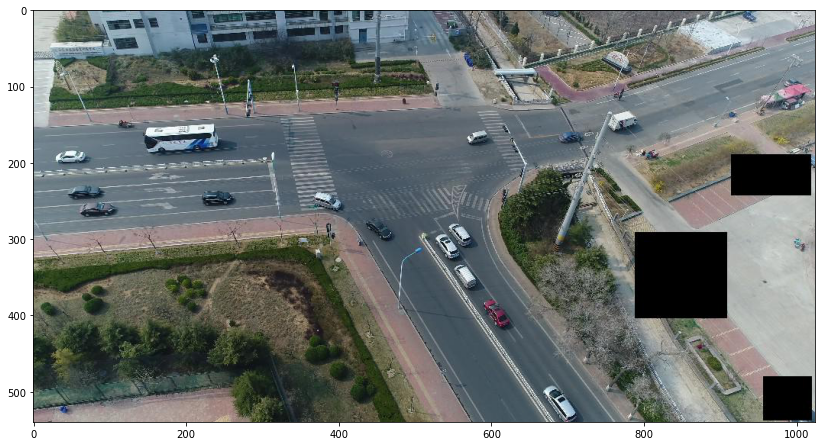

In [9]:
# Checar efeitos do pré-processamento em uma "ignore area" de uma imagem qualquer do dataset.

img_path = f"./UAVDT_YOLOv5_Dataset/train/images/M0101_img000001.jpg"
img = Image.open(img_path)
# summarize some details about the image
print(img.format)
print(img.size)
print(img.mode)
# plot image
plt.figure(figsize=(14,10))
plt.imshow(img)

# Criar um data.yaml conforme exigido pelo yolov5


In [10]:
# O conteúdo original não está adequado... mais fácil que editar: removerei-o e criarei um novo.

datayaml = """# train and val datasets (image directory or *.txt file with image paths)

train: ../UAVDT_YOLOv5_Dataset/train/images/
val: ../UAVDT_YOLOv5_Dataset/test/images/

# number of classes
nc: 3

# class names
names: ['car', 'truck', 'bus']
"""

%rm data.yaml
with open('data.yaml', 'w') as file:
    file.write(datayaml)
%cat data.yaml

rm: cannot remove 'data.yaml': No such file or directory
# train and val datasets (image directory or *.txt file with image paths)

train: ../UAVDT_YOLOv5_Dataset/train/images/
val: ../UAVDT_YOLOv5_Dataset/test/images/

# number of classes
nc: 3

# class names
names: ['car', 'truck', 'bus']


# Executar Treinamento por 50 Eṕocas

In [11]:
%cd {root}/yolov5_w
start_training_time = datetime.datetime.now()

!python train.py --epochs {tr["epocas"]} --cfg {tr["model_yaml"]} --weights {tr["weights"]}  --data ../data.yaml --img {tr["img_resolution"]} --batch-size {tr["batch_size"]} --device {tr["gpu_ids"]} --workers {tr["num_workers"]} {tr["optimizer"]} {tr["log_artifacts"]} --project {tr["project"]} --name {tr["name"]} --hyp {tr["hyperparameters"]}

finish_training_time = datetime.datetime.now()

/home/yuri/Desktop/cfd/RedesNeurais/YOLOv5_UAVDT_5/yolov5_w
github: skipping check (not a git repository)
YOLOv5  torch 1.7.1+cu101 CUDA:2 (GeForce GTX 1080 Ti, 11178.5MB)

Namespace(weights='../../YOLOv5_UAVDT_0/YOLOv5_UAVDT_train/YOLOv5_UAVDT_0-21_Feb_2021_18h_17m/weights/best.pt', cfg='./models/yolov5s.yaml', data='../data.yaml', hyp='../hyp.finetune.yaml', epochs=50, batch_size=16, img_size=[640, 640], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=False, image_weights=False, device='2', multi_scale=False, single_cls=False, adam=True, sync_bn=False, local_rank=-1, log_imgs=16, log_artifacts=True, workers=4, project='../YOLOv5_UAVDT_train', name='YOLOv5_UAVDT_5-25_Feb_2021_13h_13m', exist_ok=False, quad=False, linear_lr=False, world_size=1, global_rank=-1, save_dir='../YOLOv5_UAVDT_train/YOLOv5_UAVDT_5-25_Feb_2021_13h_13m', total_batch_size=16)
Start Tensorboard with "tensorboard --logdir ../YOLOv5_UAVDT_train", view a

# Salvar Resultados no Dropbox e no Google Cloud
Nesta etapa, salvarei os arquivos importantes no dropbox.

In [12]:
%cd {root}
print("COPY TO DROPBOX")
%mkdir -p {output_dir_dropbox}
%cp -avl logs/ {output_dir_dropbox}
%cp -avl {output_dir_local}/ {output_dir_dropbox}

print("COPY TO GCLOUD")
!gsutil -m cp -r logs/ {output_dir_gcloud}
!gsutil -m cp -r {output_dir_local}/ {output_dir_gcloud}

/home/yuri/Desktop/cfd/RedesNeurais/YOLOv5_UAVDT_5
COPY TO DROPBOX
'logs/' -> '/home/yuri/Dropbox/Experimentos/YOLOv5_UAVDT_5/YOLOv5_UAVDT_5-25_Feb_2021_13h_13m/logs'
'logs/YOLOv5_UAVDT_5_TRAIN_ipynb_25_February_2021_13h_13m_49s.txt' -> '/home/yuri/Dropbox/Experimentos/YOLOv5_UAVDT_5/YOLOv5_UAVDT_5-25_Feb_2021_13h_13m/logs/YOLOv5_UAVDT_5_TRAIN_ipynb_25_February_2021_13h_13m_49s.txt'
'/home/yuri/Desktop/cfd/RedesNeurais/YOLOv5_UAVDT_5/YOLOv5_UAVDT_train/YOLOv5_UAVDT_5-25_Feb_2021_13h_13m/' -> '/home/yuri/Dropbox/Experimentos/YOLOv5_UAVDT_5/YOLOv5_UAVDT_5-25_Feb_2021_13h_13m/YOLOv5_UAVDT_5-25_Feb_2021_13h_13m'
'/home/yuri/Desktop/cfd/RedesNeurais/YOLOv5_UAVDT_5/YOLOv5_UAVDT_train/YOLOv5_UAVDT_5-25_Feb_2021_13h_13m/events.out.tfevents.1614270487.febe.3970.0' -> '/home/yuri/Dropbox/Experimentos/YOLOv5_UAVDT_5/YOLOv5_UAVDT_5-25_Feb_2021_13h_13m/YOLOv5_UAVDT_5-25_Feb_2021_13h_13m/events.out.tfevents.1614270487.febe.3970.0'
'/home/yuri/Desktop/cfd/RedesNeurais/YOLOv5_UAVDT_5/YOLOv5_UAVDT_trai

# Finalização

In [13]:
finish_time = datetime.datetime.now()
delta_time = finish_time - start_time
delta_time_train = finish_training_time - start_training_time
print(f"""
Notebook:
Start: {start_time}
Finish: {finish_time}
Duration (hour:min:sec.microsec):  {delta_time}

Train:
Start: {start_training_time}
Finish: {finish_training_time}
Duration (hour:min:sec.microsec):  {delta_time_train}""")


Notebook:
Start: 2021-02-25 13:13:54.336635
Finish: 2021-02-25 21:59:18.205299
Duration (hour:min:sec.microsec):  8:45:23.868664

Train:
Start: 2021-02-25 13:28:05.353469
Finish: 2021-02-25 21:58:10.456975
Duration (hour:min:sec.microsec):  8:30:05.103506


In [14]:
print("Limpar arquivos desnecessários.")
%cd {root}
%rm -rf UAVDT_YOLOv5_Dataset yolov5_w data.yaml

Limpar arquivos desnecessários.
/home/yuri/Desktop/cfd/RedesNeurais/YOLOv5_UAVDT_5
